In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
with open('data_description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
test['SalePrice'] = 1-1

In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


In [10]:
train.corr()['SalePrice'].sort_values()

#OverallQual and GrLivArea are highly correlated to SalePrice

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

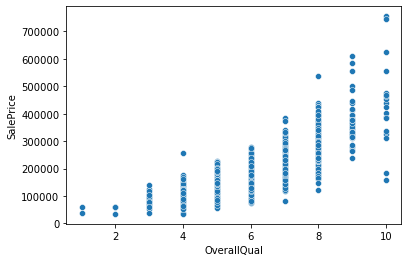

In [11]:
sns.scatterplot(data = train, x = 'OverallQual', y = 'SalePrice' )
#two outliers where quality is high but price is low

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

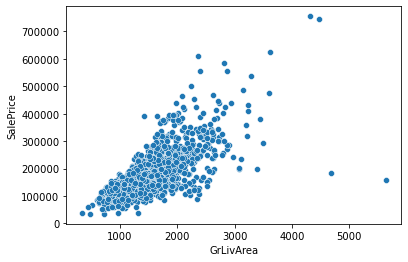

In [12]:
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice' )
#two outliers where Liv area is high but price is low

In [13]:
train[(train['SalePrice']<200000) & (train['OverallQual']>8)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [14]:
train[(train['SalePrice']<200000) & (train['GrLivArea']>4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [15]:
#thus we can drop these two points in dataset

In [16]:
train = train.drop(index = [523, 1298], axis = 0)

In [17]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [18]:
train[(train['SalePrice']<200000) & (train['OverallQual']>8)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

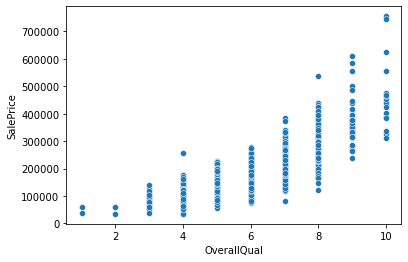

In [19]:
sns.scatterplot(data = train, x = 'OverallQual', y = 'SalePrice' )


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

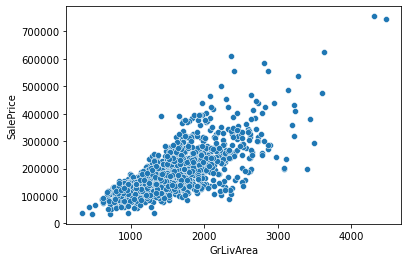

In [20]:
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice' )


In [21]:
#outliers removed from train data set

In [22]:
df = pd.concat([train, test], axis = 0, ignore_index=True)

In [23]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2913,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2914,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
2915,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0


In [24]:
id_ser = df['Id']

In [25]:
id_ser

0          1
1          2
2          3
3          4
4          5
        ... 
2912    2915
2913    2916
2914    2917
2915    2918
2916    2919
Name: Id, Length: 2917, dtype: int64

In [26]:
df = df.drop('Id', axis =1)

In [27]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [29]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [30]:
percent_nan = percent_missing(df)
percent_nan

TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
KitchenQual      0.034282
Electrical       0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
SaleType         0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
Functional       0.068564
Utilities        0.068564
BsmtHalfBath     0.068564
BsmtFullBath     0.068564
MSZoning         0.137127
MasVnrArea       0.788481
MasVnrType       0.822763
BsmtFinType1     2.708262
BsmtFinType2     2.742544
BsmtQual         2.776826
BsmtCond         2.811107
BsmtExposure     2.811107
GarageType       5.382242
GarageCond       5.450806
GarageQual       5.450806
GarageYrBlt      5.450806
GarageFinish     5.450806
LotFrontage     16.660953
FireplaceQu     48.680151
Fence           80.425094
Alley           93.212204
MiscFeature     96.400411
PoolQC          99.691464
dtype: float64

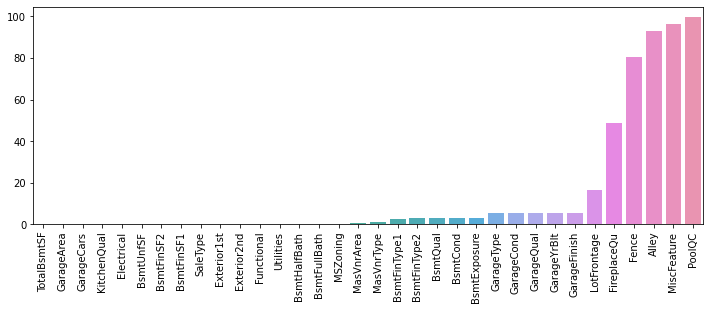

In [31]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [32]:
df = df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis = 1)

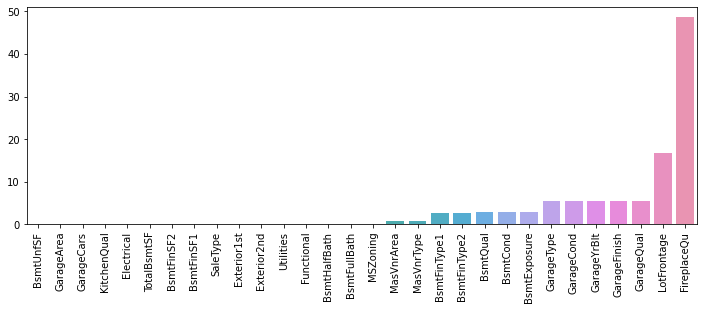

In [33]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [34]:
#for fireplacequ, Null means no fireplace

In [35]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

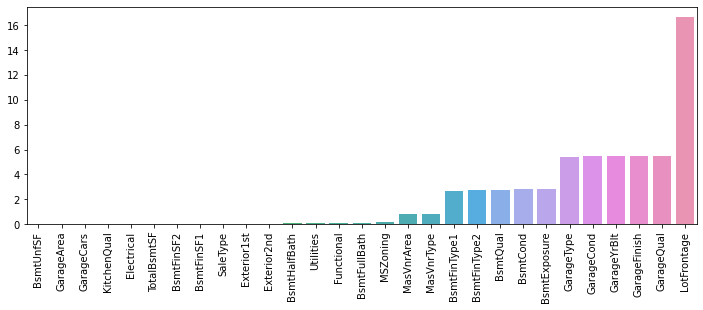

In [36]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [37]:
'''
For LotFrontage, Neighborhood is related
'''

'\nFor LotFrontage, Neighborhood is related\n'

In [38]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

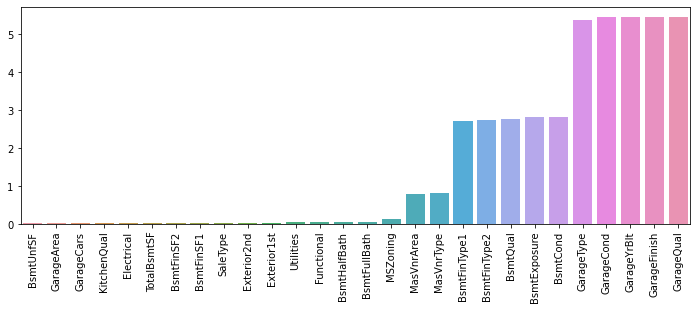

In [39]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [40]:
df[['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']] = df[['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

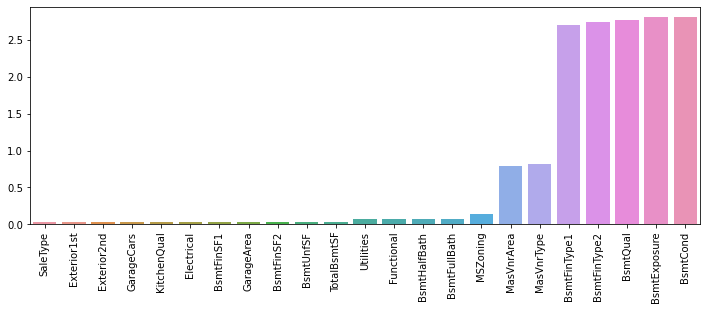

In [41]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [42]:
df[['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtExposure', 'BsmtCond']] = df[['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtExposure', 'BsmtCond']].fillna('None')

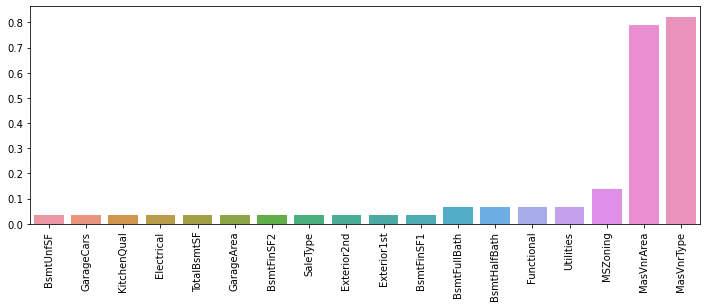

In [43]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [44]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [45]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

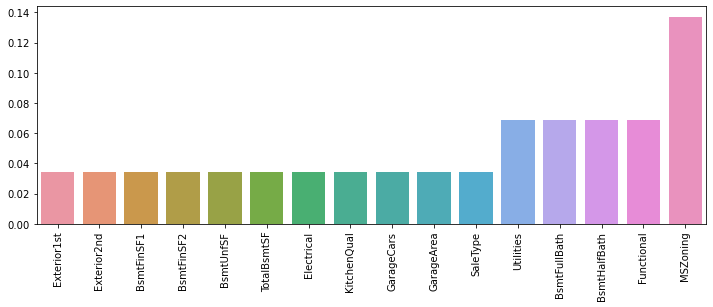

In [46]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [47]:
df['MSZoning'] = df['MSZoning'].fillna('None')

In [48]:
#for functional it is given to assume typ unless warranted

In [49]:
df['Functional'] = df['Functional'].fillna('Typ')

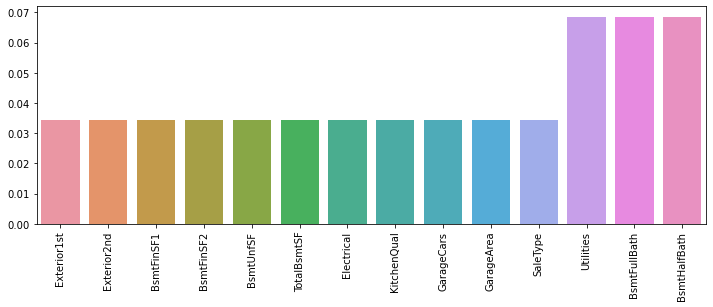

In [50]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [51]:
df[['BsmtFullBath', 'BsmtHalfBath']] = df[['BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [52]:
df[['SaleType', 'Utilities']] = df[['SaleType', 'Utilities']].fillna('None')

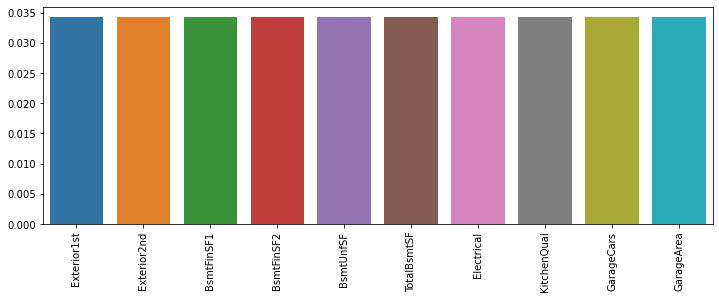

In [53]:
percent_nan = percent_missing(df)
plt.figure(figsize=(12,4))
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

In [54]:
drop_list_obj = ['Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual']
drop_list_num = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']

df[drop_list_obj] = df[drop_list_obj].fillna('None')
df[drop_list_num] = df[drop_list_num].fillna(0)

In [55]:
#no null values in the Dataset now

In [56]:
df.isnull().sum().sort_values()

MSSubClass      0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
               ..
Exterior2nd     0
Exterior1st     0
RoofMatl        0
Foundation      0
SalePrice       0
Length: 76, dtype: int64

In [57]:
'''
We have a columns MSSubClass which has a categorical data encoded with numbers. 
It is not an ordinal data thus we need to convert it into string type to get the dummy variables for encoding
'''

'\nWe have a columns MSSubClass which has a categorical data encoded with numbers. \nIt is not an ordinal data thus we need to convert it into string type to get the dummy variables for encoding\n'

In [58]:
df['MSSubClass'] #dtype: int64

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: int64

In [59]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [60]:
df['MSSubClass'] #dtype: object

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: object

In [61]:
#now we can create dummy variables

In [62]:
obj_df = df.select_dtypes(include= 'object')
num_df = df.select_dtypes(exclude= 'object')

In [63]:
obj_df.head() #we need to create dummy variables on obj_df

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [64]:
num_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000


In [65]:
obj_dummy_df = pd.get_dummies(obj_df, drop_first=True)

In [66]:
obj_dummy_df

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2913,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2914,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [67]:
final_df = pd.concat([obj_dummy_df, num_df], axis = 1)

In [68]:
final_df

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,1,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,0,1,0,0,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,0,0,0,0,0,0,1,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,0,0,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,0,0,0,0,0,0,1,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,2006,0
2913,0,1,0,0,0,0,0,0,0,0,...,0,24,0,0,0,0,0,4,2006,0
2914,0,0,0,0,1,0,0,0,0,0,...,474,0,0,0,0,0,0,9,2006,0
2915,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,0


In [69]:
final_train = final_df.iloc[0:1458] #we used upto 1458 as two entries were dropped

In [70]:
final_train

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,1,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,0,1,0,0,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,0,0,0,0,0,0,1,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,0,0,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,0,0,0,0,0,0,1,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,1,...,0,40,0,0,0,0,0,8,2007,175000
1454,0,0,0,0,1,0,0,0,0,0,...,349,0,0,0,0,0,0,2,2010,210000
1455,0,0,0,0,0,0,0,0,0,0,...,0,60,0,0,0,0,2500,5,2010,266500
1456,0,0,0,0,1,0,0,0,0,0,...,366,0,112,0,0,0,0,4,2010,142125


In [74]:
final_train.to_csv('final_train_dataset.csv', index=False)

In [71]:
final_test = final_df.iloc[1458:]

In [72]:
final_test = final_test.drop('SalePrice', axis = 1)

In [75]:
final_test.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1458,0,0,0,0,1,0,0,0,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1459,0,0,0,0,1,0,0,0,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
1460,0,0,0,0,0,0,0,0,0,1,...,482.0,212,34,0,0,0,0,0,3,2010
1461,0,0,0,0,0,0,0,0,0,1,...,470.0,360,36,0,0,0,0,0,6,2010
1462,0,0,0,0,0,0,0,0,0,0,...,506.0,0,82,0,0,144,0,0,1,2010


In [76]:
final_test.to_csv('final_test_dataset.csv', index = False)